In [293]:
import patsy
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Assignment-1

## 1-a

In [142]:
file = "https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/wage2015_subsample_inference.csv"
data = pd.read_csv(file)

In [143]:
data

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,9.615385,2.263364,1,0,0,0,1,0,0,0,0,1,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,48.076923,3.872802,0,0,0,0,1,0,0,0,0,1,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9
2,11.057692,2.403126,0,0,1,0,0,0,0,0,0,1,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
3,13.942308,2.634928,1,0,0,0,0,1,0,0,0,1,25.0,6.25,15.625,39.0625,420.0,1,6990.0,12
4,28.846154,3.361977,1,0,0,0,1,0,0,0,0,1,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,14.769231,2.692546,0,0,0,0,1,0,0,0,1,0,9.0,0.81,0.729,0.6561,4700.0,16,4970.0,9
5146,23.076923,3.138833,1,0,0,1,0,0,0,0,1,0,12.0,1.44,1.728,2.0736,4110.0,13,8680.0,20
5147,38.461538,3.649659,0,0,0,0,0,1,0,0,1,0,11.0,1.21,1.331,1.4641,1550.0,4,3680.0,6
5148,32.967033,3.495508,0,0,1,0,0,0,0,0,1,0,10.0,1.00,1.000,1.0000,2920.0,9,6570.0,11


### Unconditional wage gap due to college education

In [144]:
data[data["clg"] == 1]["lwage"].mean() - data[data["clg"] == 0]["lwage"].mean()

0.23871669071457058

In [147]:
cl = smf.ols("np.log(wage) ~ clg", data)
cl_results = cl.fit(cov_type="HC1")
cl_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     217.4
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           3.11e-48
Time:                        13:48:15   Log-Likelihood:                -4315.9
No. Observations:                5150   AIC:                             8636.
Df Residuals:                    5148   BIC:                             8649.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8950      0.010    298.327      0.000       2.876       2.914
clg            0.2387      0.016     14.746      0.000       0.207       0.270
==============================================================================
Omnibus:                      320.661   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.806
Skew:                           0.446   Prob(JB):                    7.00e-135
Kurtosis:                       4.443   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

#### The unconditional wage gap (in log-wage units) between those with college education and without is 0.2387

### Basic Control

In [148]:
### Controls
## sex, mw, so, we, exp1, exp2, exp3, exp4, and one hot encodings of occ2 and ind2

In [149]:
basic_control = smf.ols("np.log(wage) ~ clg + (sex+mw+so+we+exp1+exp2+exp3+exp4+C(occ2)+C(ind2))",
              data)
basic_control_results = basic_control.fit(cov_type="HC1")
basic_control_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     40.30
Date:                Sun, 29 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:48:27   Log-Likelihood:                -3631.3
No. Observations:                5150   AIC:                             7365.
Df Residuals:                    5099   BIC:                             7699.
Df Model:                          50                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.4508      0.100     34.447      0.000       3.254       3.647
C(occ2)[T.2]     -0.0616      0.037     -1.671      0.095      -0.134       0.011
C(occ2)[T.3]     -0.0143      0.040     -0.357      0.721      -0.093       0.064
C(occ2)[T.4]     -0.0849      0.049     -1.741      0.082      -0.181       0.011
C(occ2)[T.5]     -0.0803      0.061     -1.318      0.187      -0.200       0.039
C(occ2)[T.6]     -0.3605      0.046     -7.860      0.000      -0.450      -0.271
C(occ2)[T.7]      0.1203      0.075      1.604      0.109      -0.027       0.267
C(occ2)[T.8]     -0.3444      0.043     -8.074      0.000      -0.428      -0.261
C(occ2)[T.9]     -0.2510      0.051     -4.909      0.000      -0.351      -0.151
C(occ2)[T.10]     0.0279      0.046      0.606      0.544      -0.062       0.118
C(occ2)[T.11]    -0.5689      0.050    -11.392      0.000      -0.667      -0.471
C(occ2)[T.12]    -0.3894      0.062     -6.309      0.000      -0.510      -0.268
C(occ2)[T.13]    -0.4295      0.044     -9.664      0.000      -0.517      -0.342
C(occ2)[T.14]    -0.6299      0.045    -13.884      0.000      -0.719      -0.541
C(occ2)[T.15]    -0.5572      0.051    -10.890      0.000      -0.657      -0.457
C(occ2)[T.16]    -0.2792      0.037     -7.454      0.000      -0.353      -0.206
C(occ2)[T.17]    -0.4876      0.028    -17.511      0.000      -0.542      -0.433
C(occ2)[T.18]    -0.4185      0.187     -2.243      0.025      -0.784      -0.053
C(occ2)[T.19]    -0.3635      0.048     -7.641      0.000      -0.457      -0.270
C(occ2)[T.20]    -0.3208      0.043     -7.522      0.000      -0.404      -0.237
C(occ2)[T.21]    -0.3980      0.038    -10.458      0.000      -0.473      -0.323
C(occ2)[T.22]    -0.5406      0.041    -13.128      0.000      -0.621      -0.460
C(ind2)[T.3]     -0.1259      0.115     -1.098      0.272      -0.351       0.099
C(ind2)[T.4]     -0.2528      0.094     -2.686      0.007      -0.437      -0.068
C(ind2)[T.5]     -0.2466      0.097     -2.534      0.011      -0.437      -0.056
C(ind2)[T.6]     -0.2570      0.095     -2.713      0.007      -0.443      -0.071
C(ind2)[T.7]     -0.1724      0.115     -1.499      0.134      -0.398       0.053
C(ind2)[T.8]     -0.2064      0.111     -1.862      0.063      -0.424       0.011
C(ind2)[T.9]     -0.4033      0.095     -4.264      0.000      -0.589      -0.218
C(ind2)[T.10]    -0.1821      0.100     -1.825      0.068      -0.378       0.013
C(ind2)[T.11]    -0.1250      0.102     -1.222      0.222      -0.325       0.076
C(ind2)[T.12]    -0.0517      0.096     -0.537      0.591      -0.240       0.137
C(ind2)[T.13]    -0.1712      0.103     -1.665      0.096      -0.373       0.030
C(ind2)[T.14]    -0.1475      0.095     -1.554      0.120      -0.334       0.039
C(ind2)[T.15]    -0.3438      0.145     -2.369   

In [150]:
APE, std_err = basic_control_results.params["clg"], basic_control_results.HC1_se["clg"]
ci = [APE-1.96*std_err, APE+1.96*std_err]

In [151]:
print(f'The Average Predictive Effect is {APE}')
print(f'The 95% Confidence Interval for APE is {ci}')

The Average Predictive Effect is 0.13285534860067444
The 95% Confidence Interval for APE is [0.10068811250358381, 0.16502258469776507]


### Flexible controls (pairwise interactions) - OLS

In [152]:
y = np.log(data['wage']).values
Z = data.drop(['wage', 'lwage'], axis=1)
Z.columns

Index(['sex', 'shs', 'hsg', 'scl', 'clg', 'ad', 'mw', 'so', 'we', 'ne', 'exp1',
       'exp2', 'exp3', 'exp4', 'occ', 'occ2', 'ind', 'ind2'],
      dtype='object')

In [ ]:
Zcontrols = patsy.dmatrix('0 + (shs+hsg+scl+clg+C(occ2)+C(ind2)+mw+so+we+exp1+exp2+exp3+exp4)**2',
                           Z, return_type='dataframe')

Zcontrols = Zcontrols - Zcontrols.mean(axis=0)

In [169]:
ira_formula = "0 + (sex+mw+so+we+exp1+exp2+exp3+exp4+C(occ2)+C(ind2))**2"
X = patsy.dmatrix(ira_formula, Z, return_type='dataframe')
X.columns = [f'x{t}' for t in range(X.shape[1])] # clean column names
X = (X - X.mean(axis=0)) # demean all control covariates

# # construct interactions of treatment and (de-meaned covariates, 1)
ira_formula = "clg * ("+ "+".join(X.columns) + ")"
X['clg'] = Z['clg']
X = patsy.dmatrix(ira_formula, X, return_type='dataframe')
ira = sm.OLS(np.log(data[["wage"]]), X)
ira_results = ira.fit(cov_type="HC1")
ira_results.summary()

In [170]:
list(X.columns)

['C(occ2)[1]',
 'C(occ2)[2]',
 'C(occ2)[3]',
 'C(occ2)[4]',
 'C(occ2)[5]',
 'C(occ2)[6]',
 'C(occ2)[7]',
 'C(occ2)[8]',
 'C(occ2)[9]',
 'C(occ2)[10]',
 'C(occ2)[11]',
 'C(occ2)[12]',
 'C(occ2)[13]',
 'C(occ2)[14]',
 'C(occ2)[15]',
 'C(occ2)[16]',
 'C(occ2)[17]',
 'C(occ2)[18]',
 'C(occ2)[19]',
 'C(occ2)[20]',
 'C(occ2)[21]',
 'C(occ2)[22]',
 'C(ind2)[T.3]',
 'C(ind2)[T.4]',
 'C(ind2)[T.5]',
 'C(ind2)[T.6]',
 'C(ind2)[T.7]',
 'C(ind2)[T.8]',
 'C(ind2)[T.9]',
 'C(ind2)[T.10]',
 'C(ind2)[T.11]',
 'C(ind2)[T.12]',
 'C(ind2)[T.13]',
 'C(ind2)[T.14]',
 'C(ind2)[T.15]',
 'C(ind2)[T.16]',
 'C(ind2)[T.17]',
 'C(ind2)[T.18]',
 'C(ind2)[T.19]',
 'C(ind2)[T.20]',
 'C(ind2)[T.21]',
 'C(ind2)[T.22]',
 'C(occ2)[T.2]:C(ind2)[T.3]',
 'C(occ2)[T.3]:C(ind2)[T.3]',
 'C(occ2)[T.4]:C(ind2)[T.3]',
 'C(occ2)[T.5]:C(ind2)[T.3]',
 'C(occ2)[T.6]:C(ind2)[T.3]',
 'C(occ2)[T.7]:C(ind2)[T.3]',
 'C(occ2)[T.8]:C(ind2)[T.3]',
 'C(occ2)[T.9]:C(ind2)[T.3]',
 'C(occ2)[T.10]:C(ind2)[T.3]',
 'C(occ2)[T.11]:C(ind2)[T.3]',
 '

In [136]:
extraflex = "np.log(wage) ~ clg + (sex+mw+so+we+exp1+exp2+exp3+exp4+C(occ2)+C(ind2))**2"

control_fit_extra = smf.ols(extraflex, data=data).fit(cov_type="HC1")
control_extra_est = control_fit_extra.params['clg']

n = data.shape[0]
p = control_fit_extra.params.shape[0]

control_extra_se = control_fit_extra.HC0_se[0]*np.sqrt(n/(n-p))
# crude adjustment for the effect of dimensionality on OLS standard errors, motivated by Cattaneo, Jannson, and Newey (2018)
# for really correct way of doing this, we need to implement Cattaneo, Jannson, and Newey (2018)'s procedure.

print("Number of Extra-Flex Controls " + str( p- 1))

print("Coefficient for OLS with extra flex controls " +  str(control_extra_est))

Number of Extra-Flex Controls 1651
Coefficient for OLS with extra flex controls 0.8569280968984536


In [124]:
control_extra_est

0.11519240409725076

In [137]:
list(control_fit_extra.params.index)

['Intercept',
 'C(occ2)[T.2]',
 'C(occ2)[T.3]',
 'C(occ2)[T.4]',
 'C(occ2)[T.5]',
 'C(occ2)[T.6]',
 'C(occ2)[T.7]',
 'C(occ2)[T.8]',
 'C(occ2)[T.9]',
 'C(occ2)[T.10]',
 'C(occ2)[T.11]',
 'C(occ2)[T.12]',
 'C(occ2)[T.13]',
 'C(occ2)[T.14]',
 'C(occ2)[T.15]',
 'C(occ2)[T.16]',
 'C(occ2)[T.17]',
 'C(occ2)[T.18]',
 'C(occ2)[T.19]',
 'C(occ2)[T.20]',
 'C(occ2)[T.21]',
 'C(occ2)[T.22]',
 'C(ind2)[T.3]',
 'C(ind2)[T.4]',
 'C(ind2)[T.5]',
 'C(ind2)[T.6]',
 'C(ind2)[T.7]',
 'C(ind2)[T.8]',
 'C(ind2)[T.9]',
 'C(ind2)[T.10]',
 'C(ind2)[T.11]',
 'C(ind2)[T.12]',
 'C(ind2)[T.13]',
 'C(ind2)[T.14]',
 'C(ind2)[T.15]',
 'C(ind2)[T.16]',
 'C(ind2)[T.17]',
 'C(ind2)[T.18]',
 'C(ind2)[T.19]',
 'C(ind2)[T.20]',
 'C(ind2)[T.21]',
 'C(ind2)[T.22]',
 'C(occ2)[T.2]:C(ind2)[T.3]',
 'C(occ2)[T.3]:C(ind2)[T.3]',
 'C(occ2)[T.4]:C(ind2)[T.3]',
 'C(occ2)[T.5]:C(ind2)[T.3]',
 'C(occ2)[T.6]:C(ind2)[T.3]',
 'C(occ2)[T.7]:C(ind2)[T.3]',
 'C(occ2)[T.8]:C(ind2)[T.3]',
 'C(occ2)[T.9]:C(ind2)[T.3]',
 'C(occ2)[T.10]:C(ind2)

# Assignment-2

## 2-a

In [300]:

sample_sizes = [50, 150, 250, 350, 450, 550, 650, 750]
d = 10 
p = 0.2  
delta = 1 
base =0.3

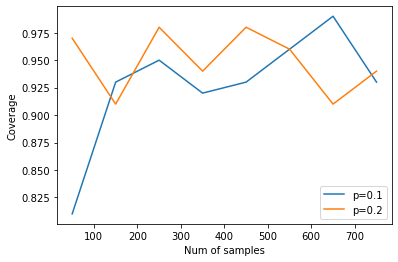

In [256]:
np.random.seed(42)

# A simple experimental data generating process
def gen_data(n, d, p, delta, base):
    D = np.random.binomial(1, p, size=(n,))
    X = np.random.normal(0, 1, size=(n, d))
    y0 = base - X[:, 0] + np.random.normal(0, 1, size=(n,))
    y1 = delta + base - X[:, 0] + np.random.normal(0, 1, size=(n,))
    y = y1 * D + y0 * (1 - D)
    return y, D, X

def twomeans(y, D):
    hat0 = np.mean(y[D==0]) # mean of outcome of un-treated
    hat1 = np.mean(y[D==1]) # mean of outcome of treated
    V0 = np.var(y[D==0]) / np.mean(1 - D) # asymptotic variance of the mean of outcome of untreated
    V1 = np.var(y[D==1]) / np.mean(D) # asymptotic variance of the mean of outcome of treated
    return hat0, hat1, V0, V1

def get_coverage(sample_sizes, d, p, delta, base, trials):
    coverage = {}
    for sample_size in sample_sizes:
        cov = []
        for _ in range(trials):
            y, D, X = gen_data(sample_size, d, p, delta, base)
            hat0, hat1, V0, V1 = twomeans(y, D)
            hat = hat1 - hat0
            stderr = np.sqrt((V0 + V1) / sample_size)
            ci = [hat - 1.96 * stderr, hat + 1.96 * stderr]
            cov += [(ci[0] <= delta) & (delta <= ci[1])] 
        coverage[sample_size] = np.mean(cov)
    return coverage


for prob in [0.1, 0.2]:
    coverage = get_coverage(p=prob, sample_sizes=sample_sizes, d=d, delta=delta, base=base, trials=100)
    lists = sorted(coverage.items()) 
    x, y = zip(*lists) 
    plt.plot(x, y, label = f'p={prob}')
    plt.xlabel("Num of samples")
    plt.ylabel("Coverage")
    plt.legend()
plt.show()

## 2-b

In [305]:
y, D, X = gen_data(sample_size, d, p, delta, base)
X = X-X.mean(axis=0)

In [306]:
# We implement the partialling out version of OLS (for pedagogical purposes)
def partialling_out(y, D, W):
    yres = y - LinearRegression().fit(W, y).predict(W) # residualize outcome with OLS
    Dres = D - LinearRegression().fit(W, D).predict(W) # residualize treatment with OLS
    hat = np.mean(yres * Dres) / np.mean(Dres**2) # calculate final residual ~ residual ols estimate
    epsilon = yres - hat * Dres # calculate residual of final regression; epsilon in the BLP decomposition
    V = np.mean(epsilon**2 * Dres**2) / np.mean(Dres**2)**2 # calculate variance of effect
    return hat, np.sqrt(V / y.shape[0])

In [307]:
hat, std_err = partialling_out(y, D, X)

In [308]:
hat, std_err

(0.951216309587453, 0.08811074608959717)

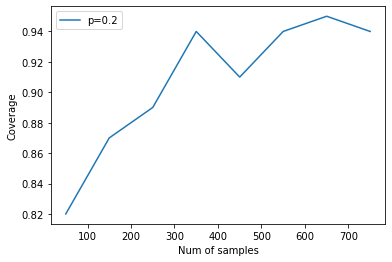

In [345]:
np.random.seed(42)
p = 0.2
def get_coverage(sample_sizes, d, p, delta, base, trials, interaction):
    coverage = {}
    for sample_size in sample_sizes:
        cov = []
        for _ in range(trials):
            y, D, X = gen_data(sample_size, d, p, delta, base)
            X = X-X.mean(axis=0)
            if not interaction: 
                hat, stderr = partialling_out(y, D, X)
            else:
                hat, stderr = partialling_out(y, D, np.hstack([D.reshape(-1,1)*X, X]))
            ci = [hat - 1.96 * stderr, hat + 1.96 * stderr]
            cov += [(ci[0] <= delta) & (delta <= ci[1])] 
        coverage[sample_size] = np.mean(cov)
    return coverage

coverage = get_coverage( p=p, sample_sizes=sample_sizes, d=d, delta=delta, base=base, trials=100, interaction=True)
lists = sorted(coverage.items()) 
x, y = zip(*lists) 
plt.plot(x, y, label = f'p={prob}')
plt.xlabel("Num of samples")
plt.ylabel("Coverage")
plt.legend()

In [326]:
D = D.reshape(-1,1)

In [327]:
X.shape

(750, 10)

In [332]:
product = (D*X)

In [333]:
np.nonzero(product)

(array([  5,   5,   5, ..., 739, 739, 739]), array([0, 1, 2, ..., 7, 8, 9]))

In [334]:
product.shape

(750, 10)

In [340]:
product[:,0]

array([-0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.71225901,  0.        ,  0.92804684, -0.12205932,  0.        ,
        0.        ,  1.41959761, -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.19146989,  1.57834715,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -1.04968534,  0.        ,
        0.        ,  0.92782835,  0.        , -0.39841018,  0.        ,
       -0.        ,  1.52899869,  0.        ,  0.6573919 ,  0.        ,
       -0.        , -0.        , -0.21083639, -0.        , -0.        ,
        0.        , -0.        ,  0.37667201,  0.        , -0.        ,
        2.17836728,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -2.13106094,
       -0.        , -0.        , -0.        , -0.        , -0.  